In [1]:
import numpy as np
import pandas as pd
import string
import seaborn as sns
import altair as alt
#import vega
import regex as re
alt.__version__

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
%matplotlib inline

import IPython; IPython.__version__
alt.data_transformers.disable_max_rows()

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [8]:
raw_data = pd.read_excel(r'./data/raw/2022_BDD_contributions_citoyennes.xlsx', 'BDD')
print("Il y a {} lignes et {} colonnes dans le dataset".format(raw_data.shape[0],raw_data.shape[1]))

FileNotFoundError: [Errno 2] No such file or directory: './data/raw/2022_BDD_contributions_citoyennes.xlsx'

In [3]:
# noramalisation des titres de colonnes
raw_data.columns = (raw_data.columns.str.strip()
                    .str.lower()
                    .str.replace(' ', '_', regex = True)
                    .str.replace('(', '', regex = True)
                    .str.replace(')', '', regex = True))

In [4]:
raw_data.head(3)

,titre,corps,nombre_de_commentaires,nombre_de_soutiens,nombre_d'abonnements,catégorie,commentaires_associés_à_la_proposition,unnamed:_7,unnamed:_8,unnamed:_9,...,unnamed:_110,unnamed:_111,unnamed:_112,unnamed:_113,unnamed:_114,unnamed:_115,unnamed:_116,unnamed:_117,unnamed:_118,unnamed:_119
0,Enquêter sur les moyens humains et financiers ...,À l’heure du réchauffement climatique débridé ...,97,1825,260,"Environnement, agriculture et mer",Je partage ce point et ici on ne parle que d'u...,Préservons la mer qui loin de toute surveillan...,Que l'on arrête de nous mentir !! La protectio...,La protection des océans doit être notre prior...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Enquêter sur l’administration des données de s...,Après avoir épuisé tous les recours pour obten...,90,1293,231,Finances publiques & fiscalité,Les citoyen ont le droit de savoir. Ces obsta...,"Quand on a rien à se reprocher, on a rien à ca...",Honte absolue de l'administration qui refuse d...,Et on s’étonne que le citoyen n’ai plus confia...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,L'argent public destiné aux fédérations de cha...,"Chaque année en France, des millions d'euros d...",114,1164,271,"Environnement, agriculture et mer",La chasse est un pseudo loisir consistant à tu...,"Pour préserver la faune sauvage, mieux vaut do...",Il est essentiel de contrôler l'usage qui est ...,Activité de « loisirs » consistant à tuer des ...,...,Pourquoi ne pas financer les dealeur.,"Si les chasseurs ""limitaient"" les populations ...",Je n’ai absolument aucun avis sur le sujet mai...,Pardon mais je cherche encore le moindre rappo...,"En France, la chasse + le balltrap c'est entre...",Il est intolérable que l'argent public finance...,J'ai déjà publié plusieurs commentaires sur ce...,"SUITE : . Mais les soi-disant ""premiers écolog...",", des agents des parcs nationaux, de l'ONF, ma...","Plus étonnant encore, l'Etat a aussi concouru ..."


In [5]:
# transformation des data types

## utilisation du datatype category préférable pour les données qui ont peu de modalités différentes --> forte réduction de la mémoire utilisée
raw_data['catégorie'] = raw_data['catégorie'].astype("category")

## transformation des colonnes datatype object --> string
string_cols = raw_data.select_dtypes(include = 'object').columns
raw_data[string_cols] = raw_data[string_cols].fillna('').astype("string")

## changement de nom de certaines colonnes
raw_data = raw_data.rename({"nombre_d'abonnements": 'nombre_abonnements', 'catégorie': 'categorie'}, axis=1)

In [6]:
# vérification des datatypes
for column in raw_data.iloc[: , :7]:
    print("La colonne", column, "est de type", raw_data[column].dtype.name)

La colonne titre est de type string
La colonne corps est de type string
La colonne nombre_de_commentaires est de type int64
La colonne nombre_de_soutiens est de type int64
La colonne nombre_abonnements est de type int64
La colonne categorie est de type category
La colonne commentaires_associés_à_la_proposition est de type string


 ### Explorations graphiques

Quelles thématiques (ou catégories) ont généré le plus : 
  - de contributions
  - de commentaires,
  - de soutiens,
  - d'abonnements

In [7]:
df = raw_data["categorie"].value_counts(sort = True)\
                          .rename_axis('categorie')\
                          .reset_index(name = 'volume')

bars = alt.Chart(df).mark_bar(color = '#ff0000', size = 14).encode(
   alt.X('volume:Q', axis = alt.Axis(labelAngle=-90)),
   alt.Y('categorie:N', sort = alt.EncodingSortField(field = "categorie", 
                                                  op = "count", 
                                                  order = 'ascending')),color = 'categorie:N')
(bars).properties(height = 400, width = 800,
                  title = "Volume de contribution par catégorie")

alt.Chart(...)

In [8]:
df = raw_data["categorie"].value_counts(normalize = True, sort = True).rename_axis('categorie').reset_index(name = 'pourcentage')

bars = alt.Chart(df).mark_bar(color = '#ff0000', size = 14).encode(
   alt.X('pourcentage:Q',  axis = alt.Axis(format ='%')),
   alt.Y('categorie:N', sort = alt.EncodingSortField(field = "categorie", 
                                                  op = "count", 
                                                  order = 'ascending')),color = 'categorie:N')
(bars).properties(height = 400, width = 800,
                  title = "Pourcentage de contribution par catégorie")

alt.Chart(...)

 Commentaire 
 - Thématique des "finances publiques et fiscalité" qui a généré le plus de contributions.
 - Dispersion des autres catégories avec seulement 8% des contributions pour l'environnement

In [9]:
df = (raw_data.groupby('categorie', as_index ='false')
        .agg({"nombre_de_commentaires": "sum"})
        .reset_index()
        .sort_values(by = ['nombre_de_commentaires'], ascending = False))

# utilisation de la librairie de dataviz altair
bars = alt.Chart(df).mark_bar(color = '#ff0000', size = 14).encode(
   alt.X('nombre_de_commentaires:Q', axis = alt.Axis(labelAngle = -90)),
   alt.Y('categorie:N', sort = alt.EncodingSortField(field = "categorie", 
                                                  op = "count", 
                                                  order = 'ascending')),color = 'categorie:N')
(bars).properties(height = 400, width = 800,
                  title = "Nombre de commentaires par catégorie")

alt.Chart(...)

 - Commentaire
   - sujet "finances publiques et fiscalité" est la thématique qui a généré le plus de commentaires,
   - la thématique de l'environnement arrive en seconde position suivi des transports puis de l'énergie
   - faibles niveaux d'intérêt pour des thématiques telles que la justice, la défense ou la sécurité intérieure.

In [10]:
df = (raw_data.groupby('categorie', as_index = 'false')
              .agg({"nombre_de_soutiens": "sum"})
              .reset_index()
              .sort_values(by = ['nombre_de_soutiens'], ascending = False))

bars = alt.Chart(df).mark_bar(color = '#ff0000', size = 14).encode(
   alt.X('nombre_de_soutiens:Q', axis = alt.Axis(labelAngle = -90)),
   alt.Y('categorie:N', sort = alt.EncodingSortField(field = "categorie", 
                                                  op = "count", 
                                                  order = 'ascending')), color = 'categorie:N')
(bars).properties(height = 400, width = 800,
                  title = "Nombre de soutiens par catégorie")

alt.Chart(...)

 - Commentaire
   - quasi égalité entre les deux premières thématiques au niveau des soutiens. 
   - forte attente au niveau de l'environnement (mobilisation d'un petit groupe de contributeurs?) 

In [11]:
df = (raw_data.groupby('categorie', as_index ='false')
      .agg({"nombre_abonnements": "sum"})
      .reset_index().
      sort_values(by = ["nombre_abonnements"], ascending=False))

bars = alt.Chart(df).mark_bar(color = '#ff0000', size = 14).encode(
   alt.X("nombre_abonnements:Q", axis = alt.Axis(labelAngle = -90)),
   alt.Y('categorie:N', sort = alt.EncodingSortField(field = "categorie", 
                                                  op = "count", 
                                                  order = 'ascending')),color = 'categorie:N')
(bars).properties(height = 400, width = 800,
                  title = "Nombre d'abonnements par catégorie")

alt.Chart(...)

Globalement la thématique des finances publiques est dominante sur l'ensemble des marqueurs (nombre de contributions, nombre d'abonnements, nombre de commentaires, nombre de soutiens). 

Toutefois, l'environement qui totalise seulement 8% des contributions (contre 34% pour la thématique des finances publiques) affichent les niveaux de commentaires et de soutiens quasi comparables à ceux observés pour la thématique des finances publiques.

### Statistiques descriptives sur les données numériques

In [12]:
# filtrage du tableau pour ne garder que les données numériques puis calcul d'indicateurs statistiques

raw_data.select_dtypes(include=['int']).describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Pastel1')\
                     .bar(subset=["max"], color='#7CAE00')\
                     .bar(subset=["mean",], color='#F8766D')\
                     .bar(subset=["std",], color='#00BFC4')   

,count,mean,std,min,25%,50%,75%,max
nombre_de_soutiens,333.000000,38.726727,156.467520,0.000000,2.000000,6.000000,16.000000,1825.000000
nombre_abonnements,333.000000,9.252252,27.540704,0.000000,2.000000,3.000000,6.000000,271.000000
nombre_de_commentaires,333.000000,3.783784,12.095806,0.000000,0.000000,0.000000,2.000000,114.000000


In [13]:
# quel est le sujet qui a généré le plus de soutiens ? (thématique environnement ?)
raw_data[raw_data['nombre_de_soutiens'] == 1825]
# réponse oui

,titre,corps,nombre_de_commentaires,nombre_de_soutiens,nombre_abonnements,categorie,commentaires_associés_à_la_proposition,unnamed:_7,unnamed:_8,unnamed:_9,...,unnamed:_110,unnamed:_111,unnamed:_112,unnamed:_113,unnamed:_114,unnamed:_115,unnamed:_116,unnamed:_117,unnamed:_118,unnamed:_119
0,Enquêter sur les moyens humains et financiers ...,À l’heure du réchauffement climatique débridé ...,97,1825,260,"Environnement, agriculture et mer",Je partage ce point et ici on ne parle que d'u...,Préservons la mer qui loin de toute surveillan...,Que l'on arrête de nous mentir !! La protectio...,La protection des océans doit être notre prior...,...,,,,,,,,,,


 ### Corrélation entre les métriques
    - sans surprise corrélation positive deux à deux entre les trois métriques
    - concernant la distribution des métriques, on note une forte déformation vers la gauche puis une longue traine

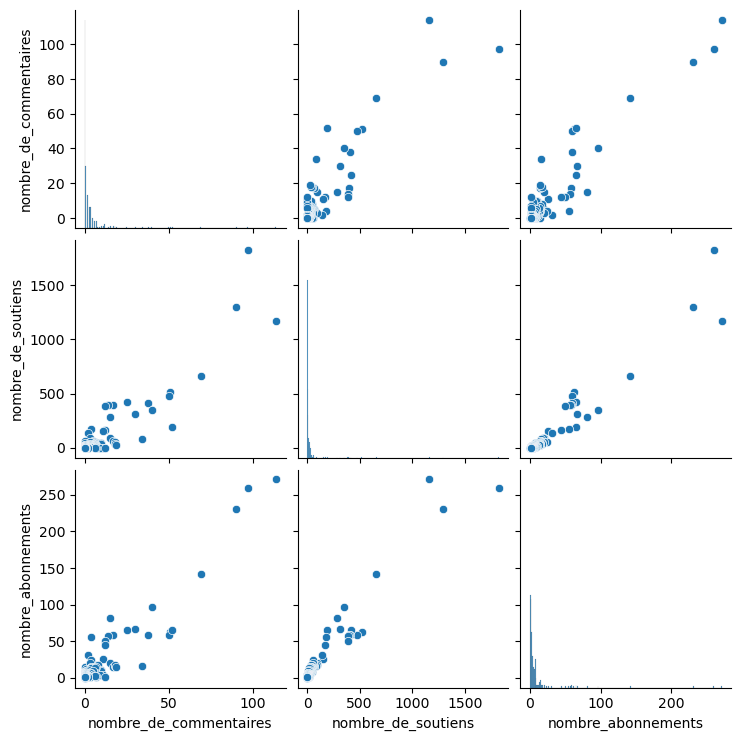

In [14]:
pairplot = raw_data[['nombre_de_commentaires', 'nombre_de_soutiens', "nombre_abonnements"]]
sns.pairplot(pairplot, palette = "husl")

<Figure size 500x500 with 0 Axes>

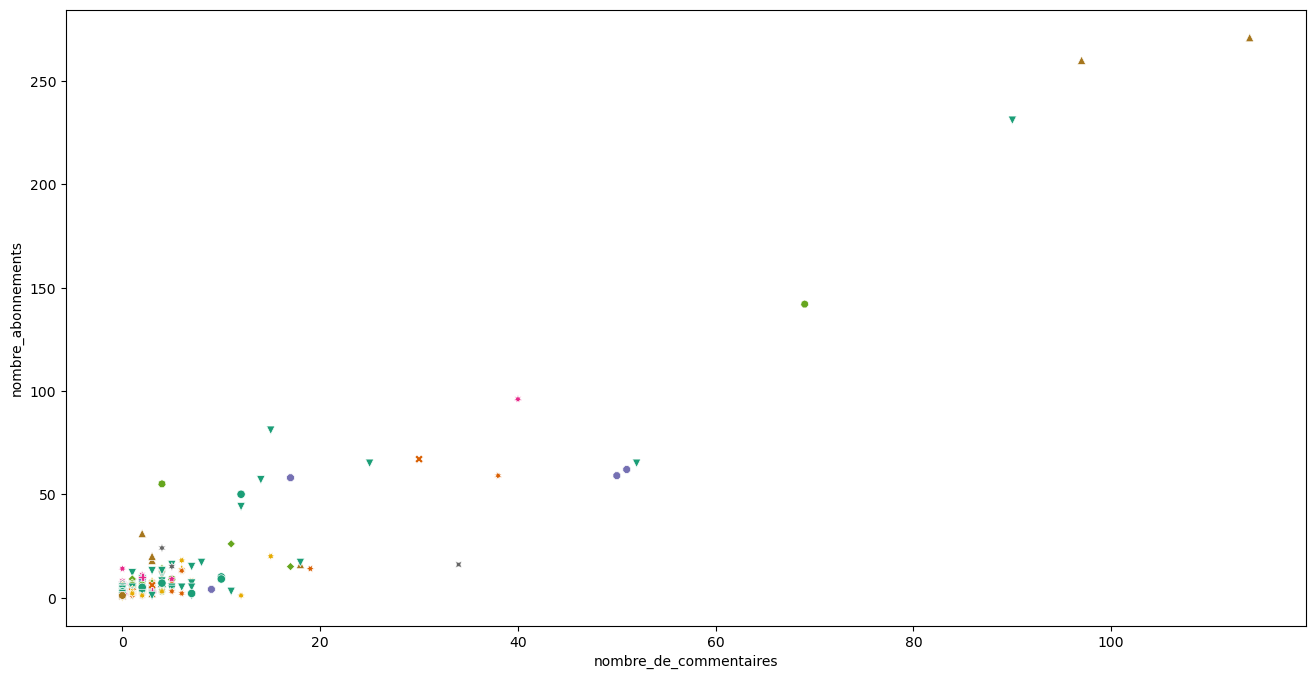

<Figure size 500x500 with 0 Axes>

In [15]:
sns.scatterplot(x = "nombre_de_commentaires", 
                y = "nombre_abonnements", 
                data = raw_data, 
                hue = "categorie", 
                style = "categorie", 
                palette = "Dark2", 
                sizes = 2, 
                legend = "full")

plt.legend([],[], frameon = False) # problème avec legend qui se superpose sur le graphique
plt.figure(figsize = (5,5))

# TO DO interactif avec sujet en légende

In [17]:
# exportation des données 
writer = pd.ExcelWriter('raw_data.xlsx', engine = 'xlsxwriter')
raw_data.to_excel(writer, sheet_name = 'Sheet1', index = False)
writer.save()

## Bac à sable

<Figure size 400x400 with 0 Axes>

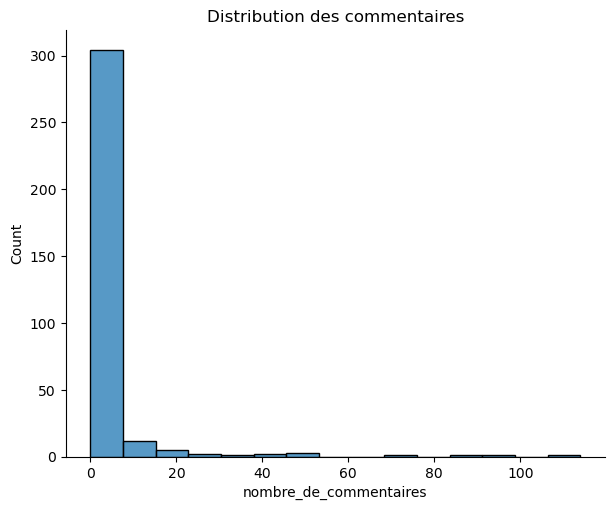

<Figure size 400x400 with 0 Axes>

In [37]:
sns.displot(data = raw_data,
            x = "nombre_de_commentaires", 
            bins = 15,
            log_scale = False,
            aspect = 1.25)

plt.title("Distribution des commentaires")
plt.ticklabel_format(style ='plain', axis = 'y')
plt.figure(figsize = (4,4))

<Figure size 400x400 with 0 Axes>

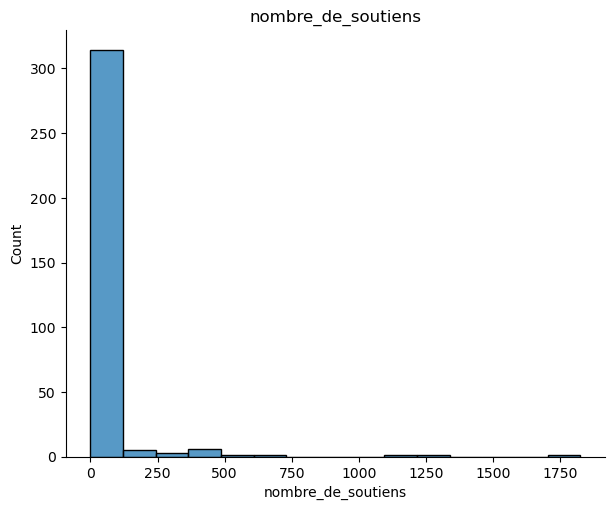

<Figure size 400x400 with 0 Axes>

In [33]:
sns.displot(data = raw_data,
            x = "nombre_de_soutiens", 
            bins = 15,
            log_scale=False,
            aspect = 1.25)

plt.title("nombre_de_soutiens")
plt.ticklabel_format(style='plain', axis='y')
plt.figure(figsize=(4,4))

In [18]:
print (pd.__version__)

1.5.1


In [19]:
import jinja2 as jj
print (jj.__version__)

3.1.2
